### Data Exploration

Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations we'll use `matplotlib`. Familiarity with these modules will serve you well. The following cells include comments to explain the purpose of each step.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
### Read in the data
tr_path = 'Resources/train.csv'
test_path = 'Resources/test.csv'
data = pd.read_csv(tr_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
### Lists column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Visualizations

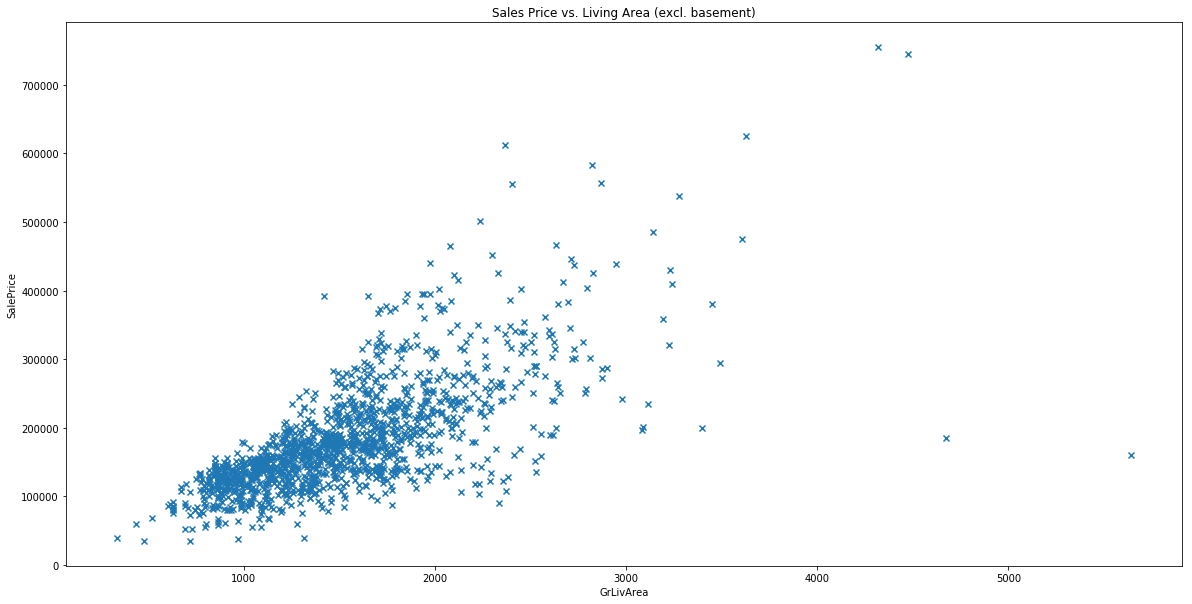

In [8]:
### We can plot the data as follows

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

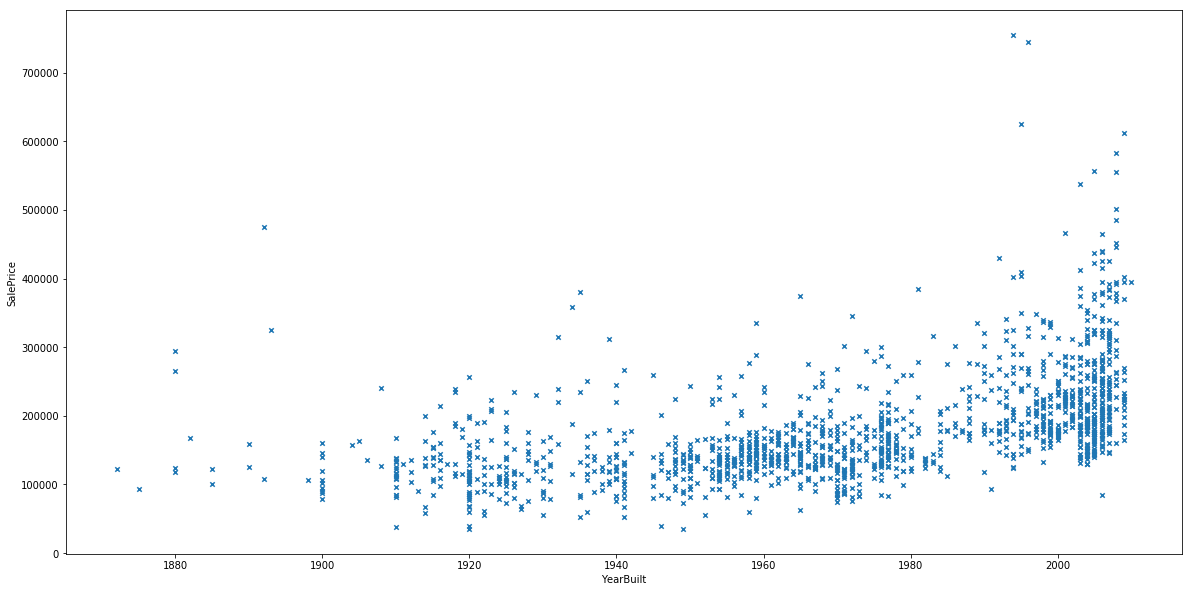

In [12]:
### Price v. Year
### Using Pandas

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

To understand the relationship between the variables in the above graph, we find the correlation coefficient.

In [13]:
correlation = np.corrcoef(X, Y)[0, 1]
correlation

0.7086244776126521

Given the above graphs and the correlation coefficient, it appears there is a **positive** correlation between the variables.

### Coding Linear Regression
Given the equation above for $w_{LS}$, we know all we need to in order to solve a linear regression. Coding out the steps in `Python`, we will complete the process in several steps.

In [16]:
### In order to create any model it is necessary to read in data

import pandas as pd
def read_to_df(file_path):
    """Read on-disk data and return a dataframe."""
    df = pd.read_csv(file_path)
    
    return df

Function **select_columns** takes a DataFrame as well as a list of column names, and returns a DataFrame that only has the columns specified in the list.

In [17]:
def select_columns(data_frame, column_names):

    data_frame = data_frame[column_names]

    return data_frame

Function **column_cutoff** will accept a DataFrame and a list of tupples in format (column_name, min_value, max_value) and will output a DataFrame which excludes rows where the value in specified column exceeds "max_value" or is less than "min_value"
We will not remove rows if the column value is equal to the min/max value

In [21]:
def column_cutoff(data_frame, cutoffs):
    """Subset data frame by cutting off limits on column values.
    Example:
        data_frame = read_into_data_frame('train.csv')
        # Remove data points with SalePrice < $50,000
        # Remove data points with GrLiveAre > 4,000 square feet
        cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
        selected_data = column_cutoff(data_frame, cutoffs)
    """
    for col in cutoffs:
        data_frame = data_frame[(data_frame[col[0]] >= col[1]) & (data_frame[col[0]] <= col[2])]
        
    return data_frame

Next you'll implement the equation above for $w_{LS}$ using the inverse matrix function.  
$$w_{LS} = (X^T X)^{−1}X^T y,$$

Function **least_squares_weights** will take as input two matricies corresponding to the X inputs and y target. We assume the matrices are of correct dimensions.
* We ensure that the number of rows is greater than or equal to the 
number of columns. If this is not the case, we transpose the matricies.
* The y input should end up as a n-by-1 matrix, and the x input as a 
n-by-p matrix
* prepend an n-by-1 column of ones to the input_x matrix
* We will use the above equation to calculate the least squares 
weights.

In [22]:
def least_squares_weights(input_x, target_y):
    """Calculate linear regression least squares weights.
        
    Example:
        import numpy as np
        training_y = np.array([[208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000]])
        training_x = np.array([[1710, 1262, 1786, 
                                1717, 2198, 1362, 
                                1694, 2090, 1774, 
                                1077], 
                               [2003, 1976, 2001, 
                                1915, 2000, 1993, 
                                2004, 1973, 1931, 
                                1939]])
        weights = least_squares_weights(training_x, training_y)
        
        print(weights)  #--> np.array([[-2.29223802e+06],
                           [ 5.92536529e+01],
                           [ 1.20780450e+03]])
                           
        print(weights[1][0]) #--> 59.25365290008861
        
    """
    # step 1 - makes sure rows > columns
    x_rows = input_x.shape[0]
    x_cols = input_x.shape[1]
    y_rows = target_y.shape[0]
    y_cols = target_y.shape[1]
    
    if x_rows < x_cols:
        input_x = input_x.transpose()
    if y_rows < y_cols:
        target_y = target_y.transpose()
    
    # prepend ones
    ones = np.ones(input_x.shape[0])
    input_x = np.insert(input_x, 0, ones, axis=1)
    
    # apply formula
    weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(input_x),input_x)),np.transpose(input_x)),target_y)
    
    return weights

We prepend a column of ones to creat an intercept term

#### Testing on Real Data

Now that we have code to read the data and perform matrix operations, we can put it all together to perform linear regression on a data set of our choosing.  

In [23]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


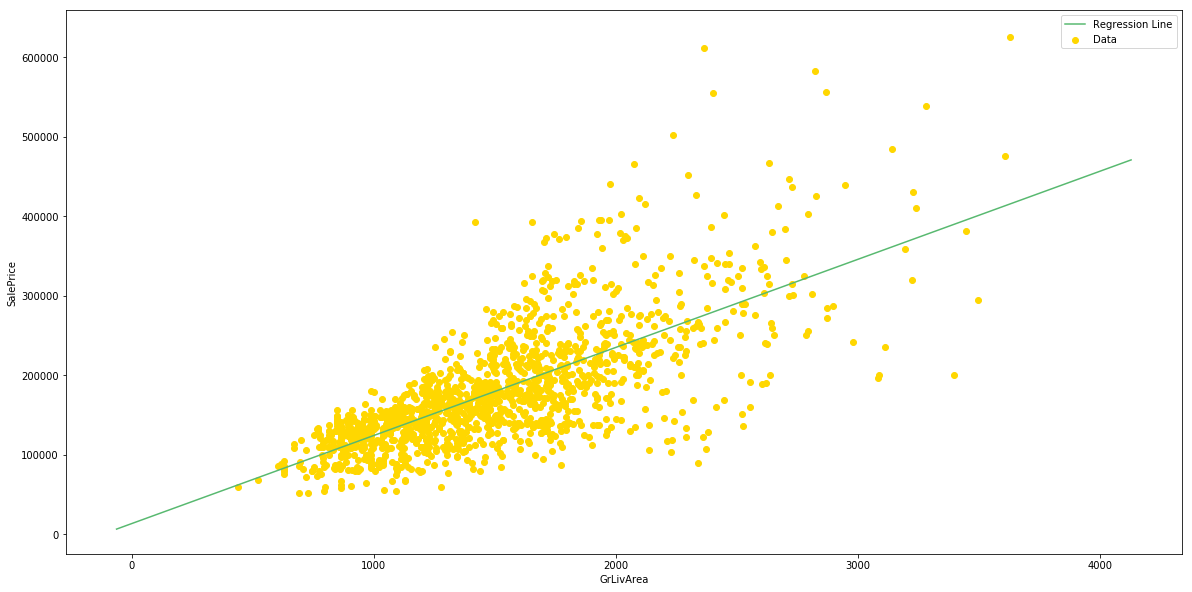

In [27]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, color='#FFD700', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#### Calculating RMSE

In [28]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)

53092.484869486616


#### Calculating $R^2$

In [30]:
ss_t = 0
ss_r = 0

mean_y = np.mean(Y)

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.5163484562864966


### sklearn implementation

While it is useful to build and program our model from scratch, we can also use more conventional methods to fit each model. The following one uses the 'scikit-learn' module.

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yeilds shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758654
Coefficient: [110.78992341]
